# Importación de librerías

In [1]:
import pandas as pd
import numpy as np

# Importación de Carrefour_productos.csv

In [98]:
df = pd.read_csv("/content/Carrefour_productos.csv")
df.head()

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
0,Productos Frescos,Carnicería,Aves y Pollo,Pechuga de Pollo Entera Carrefour 1.1 kg aprox,1.1 kg,5.49,4.99,kg,2025-04-13
1,Productos Frescos,Carnicería,Aves y Pollo,Traseros de Pollo Carrefour 1.5 kg aprox,1.5 kg,4.03,2.69,kg,2025-04-13
2,Productos Frescos,Carnicería,Aves y Pollo,Traseros de Pollo Carrefour 1 kg aprox,1 kg,2.69,2.69,kg,2025-04-13
3,Productos Frescos,Carnicería,Aves y Pollo,Alas de pollo Carrefour 1 kg aprox,1 kg,3.59,3.59,kg,2025-04-13
4,Productos Frescos,Carnicería,Aves y Pollo,Jamoncitos de pollo Carrefour 600 g aprox,600 g,2.15,3.59,kg,2025-04-13


# Análisis inicial del DataFrame

### Dimensión, estructura y tipos de datos

Utilizamos df.info() para mostrar la estructura del DataFrame. Este paso nos permite:

1. Ver cuántas filas y columnas tiene el conjunto de datos

2. Identificar los tipos de datos

3. Detectar columnas que deben ser convertidas, como insert_date (que debería ser tipo fecha)

4. Evaluar el uso de memoria

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9765 entries, 0 to 9764
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         9765 non-null   object 
 1   subcategory      9765 non-null   object 
 2   subsubcategory   9765 non-null   object 
 3   name             9765 non-null   object 
 4   description      7742 non-null   object 
 5   price            9765 non-null   float64
 6   reference_price  9764 non-null   float64
 7   reference_unit   9764 non-null   object 
 8   date             9765 non-null   object 
dtypes: float64(2), object(7)
memory usage: 686.7+ KB


In [100]:
# Convertimos la columna date al tipo datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [101]:
df.dtypes

,0
category,object
subcategory,object
subsubcategory,object
name,object
description,object
price,float64
reference_price,float64
reference_unit,object
date,datetime64[ns]


### Duplicados y nulos

 Durante el análisis de los datos, es fundamental garantizar la coherencia en los nombres de las categorías, subcategorías, subsubcategorías y nombres de productos. A menudo nos encontramos con errores como espacios adicionales en el inicio o final del texto, o incluso espacios innecesarios después de un guion bajo, que pueden dificultar el análisis y la agregación correcta de los datos. Aplicaremos una corrección específica que elimine solo los espacios innecesarios (por ejemplo, los que aparecen justo después del guion bajo) y los espacios en los extremos de las cadenas de texto.

In [102]:
df['category'] = df['category'].str.replace('_ ', '_').str.strip()
df['subcategory'] = df['subcategory'].str.replace('_ ', '_').str.strip()
df['subsubcategory'] = df['subsubcategory'].str.replace('_ ', '_').str.strip()
df['name'] = df['name'].str.replace('_ ', '_').str.strip()

Eliminamos filas duplicadas completas, es decir, aquellas donde todos los valores de todas las columnas son iguales.

In [103]:
df = df.drop_duplicates()

In [104]:
df.shape[0]

9761

Después de eliminar las filas duplicadas completas del dataset de Carrefour, el número total de registros se redujo ligeramente, pasando de 9765 a 9761 filas.  

Calculamos el número de valores nulos por cada columna.

In [105]:
df.isnull().sum()

,0
category,0
subcategory,0
subsubcategory,0
name,0
description,2023
price,0
reference_price,1
reference_unit,1
date,0


En la exploración inicial del dataset detectamos un número considerable de valores nulos en la columna description (2023 filas), lo cual podría ser esperado, es que esta columna es opcional y poco utilizada. Además, encontramos un valor nulo tanto en reference_price como en reference_unit, lo que podría afectar el análisis de precios por unidad si no se gestiona adecuadamente. Como siguiente paso, vamos a inspeccionar directamente las filas con valores nulos en reference_price y reference_unit para entender mejor el contexto y decidir si deben ser completadas, corregidas o eliminadas.

In [106]:
# Filtramos las filas donde 'reference_price' o 'reference_unit' son nulos
df_nulos = df[df['reference_price'].isnull() | df['reference_unit'].isnull()]
df_nulos

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
5111,Perfumería e Higiene,Baño e Higiene Corporal,Ojos y Oreja,Bastoncillos Carrefour Soft 300 ud.,NaN,1.32,NaN,NaN,2025-04-14


Al analizar los valores nulos en las columnas reference_price y reference_unit, detectamos una única fila con ambas columnas vacías. Se trata del producto "Bastoncillos Carrefour Soft 300 ud". Podemos calcular manualmente el precio por unidad, ya que el nombre del producto indica claramente que el paquete contiene 300 unidades. Dado que el precio total es de 1,32€, el precio por unidad sería:

In [107]:
precio_unitario = round(1.32 / 300, 3)
print(precio_unitario)

0.004


In [108]:
# Asignamos los valores calculados a la fila con valores nulos
df.loc[df['reference_price'].isnull(), 'reference_price'] = precio_unitario
df.loc[df['reference_unit'].isnull(), 'reference_unit'] = 'ud'

In [109]:
df.isnull().sum()

,0
category,0
subcategory,0
subsubcategory,0
name,0
description,2023
price,0
reference_price,0
reference_unit,0
date,0


# Detección y corrección de anomalías en los precios

Analizamos la distribución general de los precios. El resumen estadístico de las columnas price y reference_price nos permite detectar anomalías como valores extremos, alta dispersión, etc.


In [ ]:
df[['price', 'reference_price']].describe()

,price,reference_price
count,9761.000000,9761.000000
mean,6.071431,12.197553
std,13.591631,39.656383
min,0.240000,0.004000
25%,1.990000,2.070000
50%,3.350000,5.990000
75%,6.250000,13.450000
max,658.000000,2500.000000


El análisis estadístico de las columnas price (precio del producto) y reference_price (precio por unidad de medida, como €/kg o €/l) revela varios aspectos clave. El precio medio es de 6,07€, pero la desviación estándar es bastante alta (13,6€), lo que indica una gran dispersión de valores. El valor máximo de price alcanza los 658€, mientras que la mediana es de solo 3,35€, lo que muestra una distribución muy sesgada hacia la derecha, con unos pocos productos extremadamente caros que distorsionan la media. La variable reference_price presenta un comportamiento similar: el promedio es de 12,2€, la desviación estándar es de 39,66€, la mediana es de 5,99€, y el máximo es de 2500€. Estos resultados dejan claro que hay valores atípicos o anómalos que deben ser tratados antes de seguir con el análisis. El siguiente paso será visualizarlos e identificarlos para limpiar el dataset y evitar conclusiones erróneas.

Con el objetivo de detectar visualmente la presencia de valores extremos o errores de registro en los precios, generamos dos diagramas de caja: boxplot del campo price y boxplot del campo reference_price.

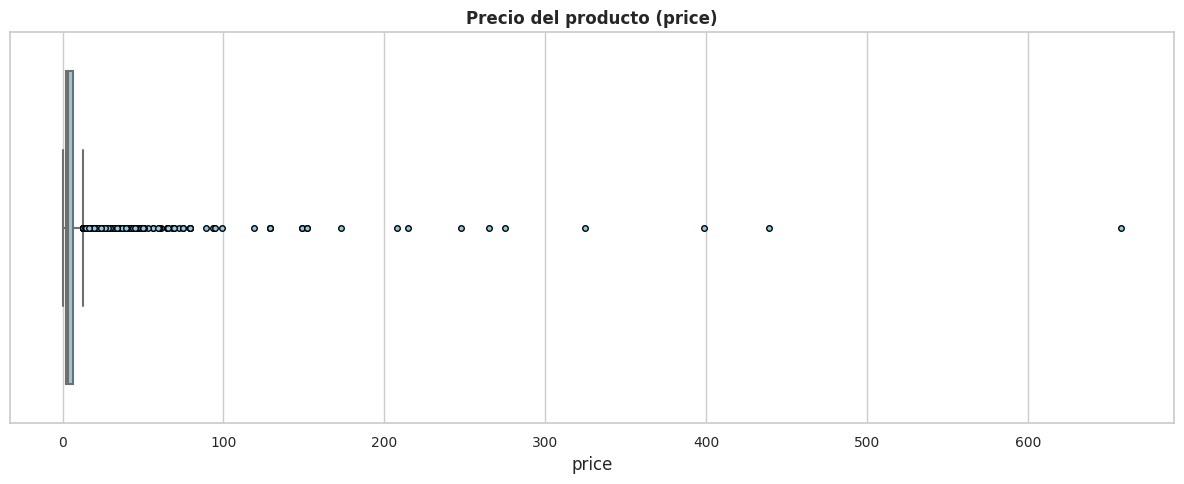

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="whitegrid", palette="pastel")

flier_props = dict(marker='o', markerfacecolor='skyblue', markersize=4, linestyle='none', markeredgecolor='black')

plt.figure(figsize=(12, 5))
sns.boxplot(
    x=df['price'],
    color='skyblue',
    fliersize=4,
    linewidth=1.5,
    flierprops=flier_props)

plt.title('Precio del producto (price)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

Podemos observar que la mayoría de los productos se concentran en un rango de precios bajo. Sin embargo, existen los valores extremos que superan los 200€, e incluso algunos que alcanzan más de 600€. Estos precios son claramente atípicos y probablemente se deban a errores en el registro de los datos.

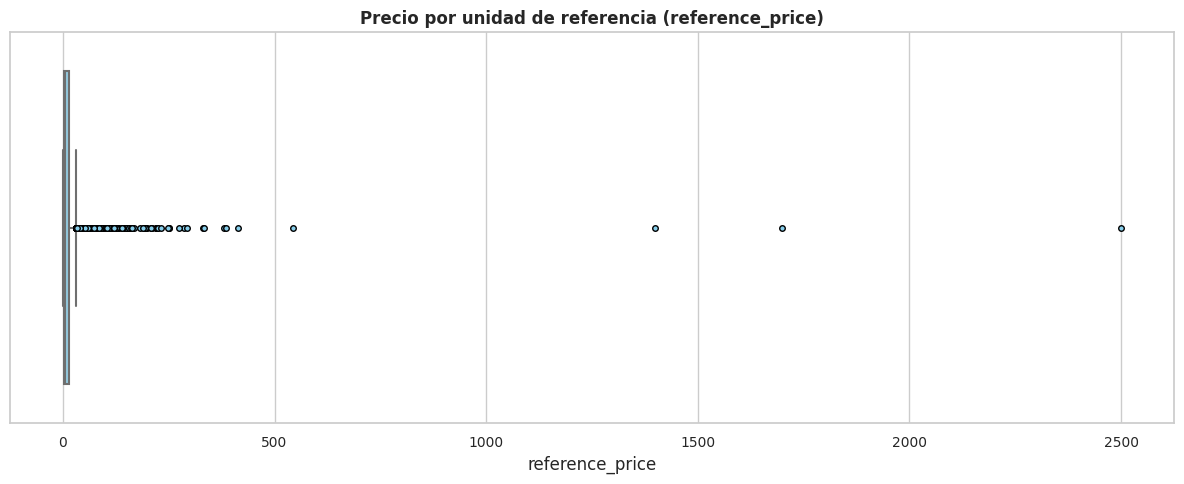

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x=df['reference_price'],
    color='skyblue',
    fliersize=4,
    linewidth=1.5,
    flierprops=flier_props)

plt.title('Precio por unidad de referencia (reference_price)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

Aunque la mayoría de los valores de reference_price se agrupan en un rango bajo, el gráfico revela la presencia de algunos valores atípicos muy alejados del resto. Se observan precios por unidad de referencia que superan los 1000€, lo cual resulta claramente inusual y poco realista. Este comportamiento confirma lo ya indicado en el resumen estadístico: existe una gran dispersión y algunos valores extremos que conviene revisar para evitar sesgos en el análisis posterior.

Ambas variables contienen valores atípicos extremos que deben ser tratados con precaución.

Para entender el origen de los precios anormalmente altos, vamos a examinar en detalle los productos con los valores más elevados en las columnas price y reference_price. Esto nos ayudará a identificar si los outliers están asociados a ciertas categorías, errores de registro o características del producto (como formatos o presentaciones especiales).

In [ ]:
# Ordenamos el DataFrame por la columna 'price' en orden descendente
# para obtener los productos con el precio más alto
top_20_price = df.sort_values(by='price', ascending=False).head(20)
top_20_price

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
647,Productos Frescos,Charcutería,Jamón serrano e ibérico Pieza,Jamón de bellota ibérico 100% raza Ibérica 5 J...,7 Kg,658.00,94.00,kg,2025-04-13
646,Productos Frescos,Charcutería,Jamón serrano e ibérico Pieza,Jamón de Bellota Ibérico 100% Raza Ibérica Sán...,7 kg,439.00,67.54,kg,2025-04-13
651,Productos Frescos,Charcutería,Jamón serrano e ibérico Pieza,Jamón de bellota ibérico curado 100% raza ibér...,7 kg,399.00,57.00,kg,2025-04-13
656,Productos Frescos,Charcutería,Jamón serrano e ibérico Pieza,Jamón de Bellota Ibérico 100% Raza Ibérica Nob...,6.5 kg,325.00,50.00,kg,2025-04-13
654,Productos Frescos,Charcutería,Jamón serrano e ibérico Pieza,Jamón de Bellota Ibérico 50% Raza Ibérica Carr...,8 kg,275.00,36.67,kg,2025-04-13
641,Productos Frescos,Charcutería,Jamón serrano e ibérico Pieza,Jamón de Bellota Ibérico 50% Raza Ibérica Iber...,7 kg,265.00,35.33,kg,2025-04-13
81,Productos Frescos,Carnicería,Vacuno,Chuletero de Vacuno Angus Carrefour Selection ...,7 kg,247.95,28.50,kg,2025-04-13
640,Productos Frescos,Charcutería,Jamón serrano e ibérico Pieza,Jamón de Cebo de Campo Ibérico 50% Raza Ibéric...,7 kg,215.00,28.67,kg,2025-04-13
645,Productos Frescos,Charcutería,Jamón serrano e ibérico Pieza,Paleta de Bellota Ibérica 100% Raza Ibérica Ci...,5 kg,208.11,43.81,kg,2025-04-13
636,Productos Frescos,Charcutería,Jamón serrano e ibérico Pieza,Jamón de Cebo Ibérico 50% Raza Ibérica Círculo...,7 kg,173.25,24.75,kg,2025-04-13


Al analizar los datos con los precios más altos, vemos que todos corresponden a productos de jamón, especialmente a piezas completas de jamón ibérico, generalmente de alrededor de 7 kg. Esto indica que estos precios son reales y no representan errores en los datos, ya que corresponden a productos de gran tamaño y alta calidad. La combinación del peso y la categoría explica estos valores elevados, por lo que deben considerarse válidos en el análisis.

Ahora hacemos lo mismo pero con la columna 'reference_price' que indica el precio por unidad.

In [ ]:
top_20_reference_price = df.sort_values(by='reference_price', ascending=False).head(20)
top_20_reference_price

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
1300,Productos Frescos,Platos Preparados Cocinados,Pastas y Pizzas,Macarrones con queso gratinado Carrefour el Me...,280 g,2.50,2500.00,kg,2025-04-13
4998,Limpieza y Hogar,Bazar,Pegamentos y Siliconas,Pegamento Súper-Glue Loctite 5 gr,5 g,8.49,1698.00,kg,2025-04-14
4996,Limpieza y Hogar,Bazar,Pegamentos y Siliconas,Pegamento Loctite con Pince Súper Glue-3 5 gr,5 g,6.99,1398.00,kg,2025-04-14
4856,Limpieza y Hogar,Ambientadores,Absorbeolores,Ambientador baño nubes de algodón Ambi Pur 1 ud.,NaN,4.35,543.75,l,2025-04-14
6650,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Crema para las bolsas y ojeras Remescar 8 ml.,bolsa,33.00,412.50,100ml,2025-04-14
8659,La Despensa,Dulce,Siropes_Aromas y Decoración,Aroma de limón Dr. Oetker 8 ml.,8 ml,3.09,386.25,l,2025-04-16
6554,Parafarmacia,Botiquín,Tos y Garganta,Pastillas de regaliz Juanola sin gluten sin la...,6 g,2.29,381.67,kg,2025-04-14
7258,Limpieza y Hogar,Ambientadores,Eléctricos,Ambientador eléctrico frescor de abril 3Voluti...,NaN,6.69,334.50,l,2025-04-15
518,Productos Frescos,Verduras y hortalizas,Setas y Hongos,Trompeta negra deshidratada bandeja 30 g,bandeja,9.95,331.67,kg,2025-04-13
7263,Limpieza y Hogar,Ambientadores,Eléctricos,Ambientador eléctrico Relaxing Zen recambio Gl...,NaN,5.85,292.50,l,2025-04-15


Vamos explorar las categorías que presentan los valores medios más altos. Esta observación nos puede ayudar a detectar patrones comunes entre los productos con precios extremos y, si es posible, aplicar correcciones sistemáticas en lugar de tratar cada producto por separado.

In [ ]:
# Agrupamos los productos por categoría y calculamos el precio medio
top_5_categorias = (
    df.groupby('category')['reference_price']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index())

top_5_categorias

,category,reference_price
0,Productos Frescos,18.640469
1,Parafarmacia,18.433488
2,La Despensa,13.159074
3,Limpieza y Hogar,10.242923
4,Mascotas,10.108284


Para entender mejor el comportamiento de estas categorías y verificar si los precios elevados son reales o erróneos, vamos a explorar en detalle los productos dentro de las primeras categorías del ranking.

In [ ]:
categoria = 'Productos Frescos'

top_20_categoria = (
    df[df['category'] == categoria]
    .sort_values(by='reference_price', ascending=False)
    .drop_duplicates(subset='name')
    .head(20))

top_20_categoria

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
1300,Productos Frescos,Platos Preparados Cocinados,Pastas y Pizzas,Macarrones con queso gratinado Carrefour el Me...,280 g,2.50,2500.00,kg,2025-04-13
518,Productos Frescos,Verduras y hortalizas,Setas y Hongos,Trompeta negra deshidratada bandeja 30 g,bandeja,9.95,331.67,kg,2025-04-13
516,Productos Frescos,Verduras y hortalizas,Setas y Hongos,Boletus deshidratado 30 g,30 g,8.55,285.00,kg,2025-04-13
517,Productos Frescos,Verduras y hortalizas,Setas y Hongos,Rebozuelo deshidratado bandeja 30 g,bandeja,7.49,249.67,kg,2025-04-13
8383,Productos Frescos,Charcutería,Salchichón Salami y Fuet,Fuet snack original King upp ElPozo sin gluten...,40 g,0.99,247.50,kg,2025-04-16
1186,Productos Frescos,Charcutería y Quesos al Corte,Jamón a Cuchillo,Jamón de Bellota Ibérico 100% Raza Ibérica en ...,80 g,17.52,219.00,kg,2025-04-13
1187,Productos Frescos,Charcutería y Quesos al Corte,Jamón a Cuchillo,Jamón de Bellota Ibérico 100% Raza Ibérica 5J ...,100 g,21.90,219.00,kg,2025-04-13
1079,Productos Frescos,Panadería Tradicional,Pan Rebanado,Pan campeonato Fricopan Spanien 750 g,750 g,1.88,208.89,kg,2025-04-13
1189,Productos Frescos,Charcutería y Quesos al Corte,Jamón a Cuchillo,Jamón de Bellota Ibérico 100% Raza Ibérica en ...,80 g,15.92,199.00,kg,2025-04-13
1188,Productos Frescos,Charcutería y Quesos al Corte,Jamón a Cuchillo,Jamón de bellota ibérico 75% raza ibérica al c...,100 g,15.50,155.00,kg,2025-04-13


Al analizar los datos con precios de referencia anormalmente altos, se observa que la mayoría de estas filas corresponden a productos con poco peso o pequeñas presentaciones, como setas gourmet, foie gras, salmón, jamón en porciones pequeñas. En estos casos, el precio por kilogramo es naturalmente alto y está justificado.

Pero también vemos aquí algunos valores erróneos del precio de referencia, por ejemplo, en la primera fila.

In [110]:
# Corregimos reference_price en la primera fila
df.at[1300, 'reference_price'] = round(2.50 /0.280, 2)

También vemos un error en la fila con el índice 1079. El producto es Pan campeonato Fricopan Spanien 750 g, con un reference_price de 208,89€/kg, lo cual es un valor excesivo para un pan. Esto se debe a que el cálculo se basa en el peso total (750 g) y un precio de 1,88 €, lo que sugiere que se debería corregir esta cifra. El reference_price correcto se calcularía dividiendo el precio por el peso en kilogramos.

In [111]:
# Corregimos reference_price en la fila 1079
df.at[1079, 'reference_price'] = round(1.88 / 0.750, 2)

También vemos un error en la fila con el índice 8383. El producto es Fuet snack original King upp ElPozo sin gluten de 40 g, con un precio de 0,99 € y un reference_price de 247,50 €/kg. Este valor es excesivo, pero se explica por el bajo peso del producto. El valor correcto de reference_price se puede calcular dividiendo el precio entre el peso en kilogramos:

In [112]:
# Corregimos reference_price en la fila 8383
df.at[8383, 'reference_price'] = round(0.99 / 0.040, 2)

Vamos a ver la categoria "Parafarmacia"

In [ ]:
categoria = 'Parafarmacia'

top_10_categoria = (
    df[df['category'] == categoria]
    .sort_values(by='reference_price', ascending=False)
    .drop_duplicates(subset='name')
    .head(10))

top_10_categoria

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
6650,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Crema para las bolsas y ojeras Remescar 8 ml.,bolsa,33.00,412.50,100ml,2025-04-14
6554,Parafarmacia,Botiquín,Tos y Garganta,Pastillas de regaliz Juanola sin gluten sin la...,6 g,2.29,381.67,kg,2025-04-14
6655,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Serum facial antiedad Eucerin 7.5 ml,7.5 ml,18.79,250.53,100ml,2025-04-14
6807,Parafarmacia,Nutrición y Dietética,Complementos Vitamínicos,Valeriana ProNutri 60 ud.,NaN,4.05,192.86,kg,2025-04-14
6659,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Contorno de ojos rellenador de arrugas Hyaluro...,NaN,27.20,181.33,100ml,2025-04-14
6386,Parafarmacia,Higiene Bucal,Pasta de dientes,Gel protector bucal Bexident Aftas Isdin 8 ml.,8 ml,13.35,166.87,100ml,2025-04-14
6631,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Crema contorno de ojos antiedad Retinol Boost ...,15 ml,24.20,161.33,100ml,2025-04-14
6834,Parafarmacia,Nutrición y Dietética,Control de Peso,Infusión control peso Bie3 25 ud.,NaN,5.95,156.58,kg,2025-04-14
6670,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Serum Hyaluron Activ B3 Avène 30 ml.,30 ml,42.00,140.00,100ml,2025-04-14
6656,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Contorno de ojos tratamiento anti-edad Xhekpon...,15 ml,20.90,139.33,100ml,2025-04-14


Según los datos, los precios de referencia (por ejemplo, 412,50€/100 ml, 381,67 €/kg, 250,53€/100 ml) son coherentes con la naturaleza de los productos en la categoría Parafarmacia. Son cosméticos, productos de cuidado facial, geles dentales, cremas y otros artículos de alto coste por unidad de peso o volumen.
Los precios son razonables: estos productos suelen tener volúmenes pequeños (por ejemplo, 8 ml, 15 ml) y precios altos por cada 100 ml o un kg. Por lo tanto, los datos parecen ser adecuados y no se detectan errores o valores atípicos. Estos productos realmente pueden ser caros por unidad de volumen, algo típico en productos de parafarmacia.

In [ ]:
categoria = 'La Despensa'

top_10_categoria = (
    df[df['category'] == categoria]
    .sort_values(by='reference_price', ascending=False)
    .drop_duplicates(subset='name')
    .head(10))

top_10_categoria

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
8659,La Despensa,Dulce,Siropes_Aromas y Decoración,Aroma de limón Dr. Oetker 8 ml.,8 ml,3.09,386.25,l,2025-04-16
1548,La Despensa,Alimentación,Especias y Sazonadores,Orégano Carmencita 8 g.,8 g,2.19,273.75,kg,2025-04-13
1685,La Despensa,Alimentación,Vitaminas y Complementos,Melatonina + GABA en cápsulas NaturTierra sin ...,NaN,3.55,221.87,kg,2025-04-14
2237,La Despensa,Desayuno,Azúcar y Edulcorantes,Edulcorate con extracto de estevia en comprimi...,NaN,1.18,196.67,kg,2025-04-14
1541,La Despensa,Alimentación,Especias y Sazonadores,Canela en rama Carmencita 5 ud.,NaN,3.49,193.89,kg,2025-04-13
8650,La Despensa,Dulce,Siropes_Aromas y Decoración,Colorantes alimentarios Vahiné 3 ud.,NaN,3.39,188.33,kg,2025-04-16
8651,La Despensa,Dulce,Siropes_Aromas y Decoración,Aroma de vainilla de Madagascar Dr. Oetker 35 g.,35 g,5.69,162.57,kg,2025-04-16
2802,La Despensa,Dulce,Repostería,Gelatina alimentaria en hojas Vahiné 17 g.,17 g,2.69,158.24,kg,2025-04-14
1551,La Despensa,Alimentación,Especias y Sazonadores,Sazonador para paella con azafrán Carmencita s...,20 g,3.05,152.50,kg,2025-04-13
1690,La Despensa,Alimentación,Vitaminas y Complementos,Complejo multivitamínico en cápsulas NaturTier...,NaN,4.85,151.56,kg,2025-04-14


En la categoría La Despensa vemos una gran variedad de especias (por ejemplo, orégano, canela, azafrán), aromatizantes (limón, vainilla), edulcorantes, vitaminas y complementos. Estos productos tienen un peso pequeño (por ejemplo, 8 g, 20 g, 8 ml) y un precio bajo (entre 2 y 5 €), pero un precio por kilogramo o litro muy alto (hasta 386,25 €/l o 273,75 €/kg). Esto es completamente normal para especias, condimentos y complementos, ya que se usan en pequeñas cantidades y tienen un alto coste por unidad de peso.


In [ ]:
categoria = 'Limpieza y Hogar'

top_10_categoria = (
    df[df['category'] == categoria]
    .sort_values(by='reference_price', ascending=False)
    .drop_duplicates(subset='name')
    .head(10))

top_10_categoria

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
4998,Limpieza y Hogar,Bazar,Pegamentos y Siliconas,Pegamento Súper-Glue Loctite 5 gr,5 g,8.49,1698.00,kg,2025-04-14
4996,Limpieza y Hogar,Bazar,Pegamentos y Siliconas,Pegamento Loctite con Pince Súper Glue-3 5 gr,5 g,6.99,1398.00,kg,2025-04-14
4856,Limpieza y Hogar,Ambientadores,Absorbeolores,Ambientador baño nubes de algodón Ambi Pur 1 ud.,NaN,4.35,543.75,l,2025-04-14
7258,Limpieza y Hogar,Ambientadores,Eléctricos,Ambientador eléctrico frescor de abril 3Voluti...,NaN,6.69,334.50,l,2025-04-15
7263,Limpieza y Hogar,Ambientadores,Eléctricos,Ambientador eléctrico Relaxing Zen recambio Gl...,NaN,5.85,292.50,l,2025-04-15
4905,Limpieza y Hogar,Calzado,Limpiador Líquido,Tinta rápida calzado negra Búfalo 25 ml.,25 ml,3.75,150.00,l,2025-04-14
7250,Limpieza y Hogar,Ambientadores,Eléctricos,Ambientador eléctrico vainilla Essential recam...,NaN,1.64,82.00,l,2025-04-15
4997,Limpieza y Hogar,Bazar,Pegamentos y Siliconas,Contactceys Ceys 30ml,30ml,1.99,66.33,l,2025-04-14
4827,Limpieza y Hogar,Ambientadores,Decorativos,Ambientador de varillas infusión naranja canel...,75 ml,4.95,66.00,100ml,2025-04-14
7248,Limpieza y Hogar,Ambientadores,Eléctricos,Ambientador eléctrico manzana canela Essential...,NaN,1.28,64.00,l,2025-04-15


En la categoría Limpieza y Hogar vemos pegamentos (por ejemplo, Pegamento Súper-Glue Loctite 5 gr), ambientadores eléctricos, ambientadores de baño, y líquidos varios. "reference_price" de estos productos varía de 64 €/l a 1698 €/kg. Los valores muy altos están asociados a pequeños envases de pegamento (5 g) con un precio relativamente alto (8,49 €). Esto es normal: el pegamento se vende en pequeñas dosis, por lo que el precio por kilogramo es muy alto.


In [ ]:
categoria = 'Mascotas'

top_10_categoria = (
    df[df['category'] == categoria]
    .sort_values(by='reference_price', ascending=False)
    .drop_duplicates(subset='name')
    .head(10))

top_10_categoria

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
6247,Mascotas,Peces y tortugas,Tortugas,Tetra Reptomin Comida para Tortugas Acuáticas ...,1L,19.29,87.68,kg,2025-04-14
8060,Mascotas,Gatos,Pienso para gatos,Comida húmeda sabor atún para gato adulto Puri...,57 g,3.49,61.23,kg,2025-04-16
8028,Mascotas,Gatos,Pienso para gatos,Comida húmeda sabor pollo para gato adulto Pur...,57 g,3.49,61.23,kg,2025-04-16
6202,Mascotas,Gatos,Premios y Snacks,Pasta de malta con queso para gato aduto Vitak...,100 g,5.75,57.50,kg,2025-04-14
9623,Mascotas,Perros,Premios_Snacks y Huesos,Snack para perros Vitakraft Beef Burguer 18 g.,18 g,0.95,52.78,kg,2025-04-16
6231,Mascotas,Pájaros,Pienso para pájaros,Menú premium para periquitos Vitakraft 1 kg,1 kg,2.99,49.83,kg,2025-04-14
6194,Mascotas,Gatos,Premios y Snacks,Snack para gatos Purina Felix 45 g,45 g,1.95,43.33,kg,2025-04-14
6186,Mascotas,Gatos,Premios y Snacks,Snack crispies buey y pollo para gato 45 g,45 g,1.95,43.33,kg,2025-04-14
6201,Mascotas,Gatos,Premios y Snacks,Pasta de Malta 100 g,100 g,3.99,39.90,ud,2025-04-14
9628,Mascotas,Perros,Premios_Snacks y Huesos,Barrita de proteína pollo para perros NAP 50 g,50 g,1.99,39.80,kg,2025-04-16


El reference_price en la categoría Mascotas refleja el coste real de piensos y snacks por kilogramo, y los datos parecen correctos.

In [ ]:
top_20_reference_price = df.sort_values(by='reference_price', ascending=False).head(20)
top_20_reference_price

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
4998,Limpieza y Hogar,Bazar,Pegamentos y Siliconas,Pegamento Súper-Glue Loctite 5 gr,5 g,8.49,1698.00,kg,2025-04-14
4996,Limpieza y Hogar,Bazar,Pegamentos y Siliconas,Pegamento Loctite con Pince Súper Glue-3 5 gr,5 g,6.99,1398.00,kg,2025-04-14
4856,Limpieza y Hogar,Ambientadores,Absorbeolores,Ambientador baño nubes de algodón Ambi Pur 1 ud.,NaN,4.35,543.75,l,2025-04-14
6650,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Crema para las bolsas y ojeras Remescar 8 ml.,bolsa,33.00,412.50,100ml,2025-04-14
8659,La Despensa,Dulce,Siropes_Aromas y Decoración,Aroma de limón Dr. Oetker 8 ml.,8 ml,3.09,386.25,l,2025-04-16
6554,Parafarmacia,Botiquín,Tos y Garganta,Pastillas de regaliz Juanola sin gluten sin la...,6 g,2.29,381.67,kg,2025-04-14
7258,Limpieza y Hogar,Ambientadores,Eléctricos,Ambientador eléctrico frescor de abril 3Voluti...,NaN,6.69,334.50,l,2025-04-15
518,Productos Frescos,Verduras y hortalizas,Setas y Hongos,Trompeta negra deshidratada bandeja 30 g,bandeja,9.95,331.67,kg,2025-04-13
7263,Limpieza y Hogar,Ambientadores,Eléctricos,Ambientador eléctrico Relaxing Zen recambio Gl...,NaN,5.85,292.50,l,2025-04-15
516,Productos Frescos,Verduras y hortalizas,Setas y Hongos,Boletus deshidratado 30 g,30 g,8.55,285.00,kg,2025-04-13


Después de corregir los errores individuales, ahora vemos que los datos con precios de referencia altos son bastante adecuados.

In [ ]:
df[['price', 'reference_price']].describe()

,price,reference_price
count,9761.000000,9761.000000
mean,6.071431,11.898383
std,13.591631,30.476121
min,0.240000,0.004000
25%,1.990000,2.070000
50%,3.350000,5.990000
75%,6.250000,13.410000
max,658.000000,1698.000000


Tras aplicar la corrección a los valores anómalos en la columna reference_price, se observa una mejora notable en la calidad de los datos. La media de price bajó de 12.2 € a 11.9 €, lo que indica que se redujo el efecto de los valores extremos. La desviación estándar también disminuyó, de 39.66 € a 30.48 €.

Es importante revisar también los productos con los valores más bajos de price. Este análisis nos permite detectar posibles errores en el rango inferior, como precios inusualmente bajos causados por errores de entrada o redondeo. A continuación, mostramos los 10 productos con el precio más bajo del conjunto de datos.

In [ ]:
# Seleccionamos los 10 productos con el precio más bajo
top_10_mas_baratos = df.sort_values('price', ascending=True).head(10)
top_10_mas_baratos

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
9312,Bebidas,Aguas y Zumos,Agua hasta 0.75 litros,Agua mineral Font Natura 0.5 l,0.5 l,0.24,0.48,l,2025-04-16
9291,Bebidas,Aguas y Zumos,Agua hasta 0.75 litros,Agua mineral Fuente Primavera 50 cl.,NaN,0.24,0.48,l,2025-04-16
9338,Bebidas,Aguas y Zumos,Agua de 0.75 a 2 litros,Agua mineral Font Natura 1.5 l,1.5 l,0.25,0.17,l,2025-04-16
9317,Bebidas,Aguas y Zumos,Agua de 0.75 a 2 litros,Agua mineral Fuente Primavera 1.5 l,1.5 l,0.25,0.17,l,2025-04-16
9295,Bebidas,Aguas y Zumos,Agua hasta 0.75 litros,Agua mineral Carrefour Kids tapón deportivo 33...,NaN,0.26,0.79,l,2025-04-16
3765,Bebidas,Aguas y Zumos,Agua con gas,Agua mineral con gas Carrefour 50 cl.,NaN,0.27,0.54,l,2025-04-14
9313,Bebidas,Aguas y Zumos,Agua hasta 0.75 litros,Agua mineral Carrefour Classic 50 cl.,NaN,0.29,0.58,l,2025-04-16
3778,Bebidas,Aguas y Zumos,Agua con gas,Agua mineral con gas Carrefour Classic 50 cl.,NaN,0.29,0.58,l,2025-04-14
9290,Bebidas,Aguas y Zumos,Agua hasta 0.75 litros,Agua mineral Carrefour 50 cl.,NaN,0.29,0.58,l,2025-04-16
9316,Bebidas,Aguas y Zumos,Agua hasta 0.75 litros,Agua mineral Carrefour natural 50 cl.,NaN,0.29,0.58,l,2025-04-16


El análisis de los productos con los precios más bajos no revela ninguna anomalía. Aunque los valores de price están por debajo de los 0,30€, estos precios son coherentes con el tipo de producto, su formato y el peso o volumen declarado. Por ejemplo, botellas de agua en diferentes formatos presentan precios bajos esperables, con reference_price también consistentes. En consecuencia, no se requiere ninguna corrección en este segmento del dataset.

Ahora vamos a ver también los productos con los precios por unidad (reference_price) más bajos. Así podemos comprobar si hay valores demasiado bajos que no tienen sentido o si todo está correcto.

In [ ]:
# Seleccionamos los 10 productos con el reference_price más bajo
top_10_mas_baratos_reference_price = df.sort_values('reference_price', ascending=True).head(10)
top_10_mas_baratos_reference_price

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
5111,Perfumería e Higiene,Baño e Higiene Corporal,Ojos y Oreja,Bastoncillos Carrefour Soft 300 ud.,NaN,1.32,0.004,ud,2025-04-14
6042,Bebé,Pañales y Toallitas,Toallitas,Toallitas bebé fresh aloe vera Carrefour Baby ...,NaN,5.75,0.010,ud,2025-04-14
6041,Bebé,Pañales y Toallitas,Toallitas,Toallitas bebé fres aloe vera Carrefour 80 ud.,NaN,0.99,0.010,ud,2025-04-14
6044,Bebé,Pañales y Toallitas,Toallitas,Toallitas para bebé con aloe vera Carrefour pa...,pack,2.95,0.010,ud,2025-04-14
5112,Perfumería e Higiene,Baño e Higiene Corporal,Ojos y Oreja,Bastoncillos de algodón ecológicos Carrefour B...,NaN,1.57,0.010,ud,2025-04-14
4958,Limpieza y Hogar,Papelería,Pequeño Accesorio,400 Notas adhesivas 76X76,NaN,3.59,0.010,ud,2025-04-14
7434,Perfumería e Higiene,Cuidado y Protección Corporal,Limpieza Facial,Discos desmaquillantes doble cara Carrefour 11...,NaN,1.19,0.010,ud,2025-04-15
4379,Limpieza y Hogar,Papel y Celulosa,Pañuelos,Pañuelos con loción suavizante Carrefour 200 ud.,NaN,1.25,0.010,ud,2025-04-14
6052,Bebé,Pañales y Toallitas,Toallitas,Toallitas bebe camomila My Carrefour Baby 80 ud.,NaN,1.69,0.020,ud,2025-04-14
5635,Perfumería e Higiene,Cosmética,Accesorios de Maquillaje y Manicura y Pedicura,Bastoncillos de maquillaje Carrefour 100 ud.,NaN,2.49,0.020,ud,2025-04-14


Al observar los productos con el precio de referencia más bajo, notamos que se trata principalmente de artículos de uso doméstico diario, como:

- pañuelos de papel;

- servilletas;

- bastoncillos de algodón;

- discos desmaquillantes.

Estos productos suelen venderse en formatos muy ligeros o individuales, lo cual explica su bajo precio por unidad de medida. Los valores observados (de 0.004 a 0.02 €/ud) son coherentes con su naturaleza y volumen, por lo tanto, no requieren corrección.

Para visualizar de forma más clara la distribución de los precios de todos los productos del supermercado, generamos un histograma que muestra la cantidad de artículos en cada rango de precio.

<Axes: >

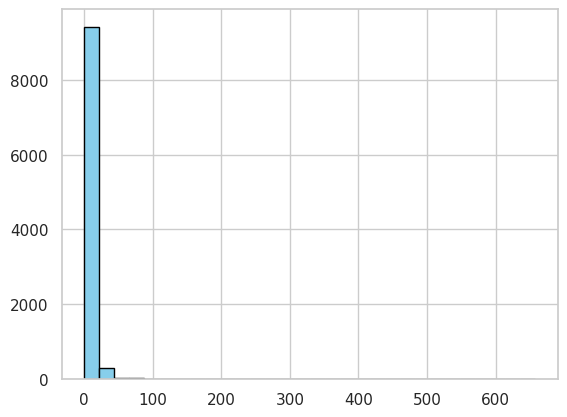

In [ ]:
# La distribución final de los precios
df["price"].hist(bins=30, color='skyblue', edgecolor='black')

Para comprender mejor la distribución de los datos y detectar desviaciones raras pero importantes en nuestro caso, podemos utilizar gráficos con escala logarítmica. Estos permiten no solo visualizar la distribución principal de los valores, sino también destacar aquellos datos que pasarían desapercibidos en una escala lineal. A continuación, analizaremos los gráficos de distribución de price y reference_price, elaborados con escala logarítmica en los ejes X o Y.

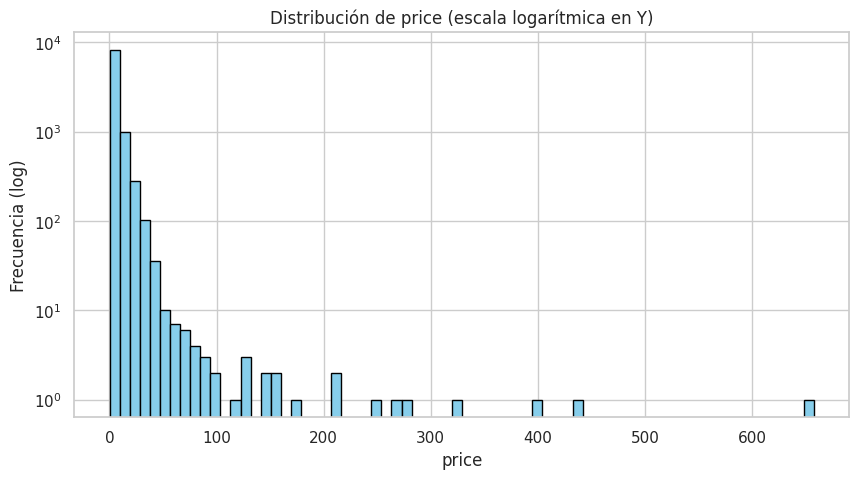

In [ ]:
plt.figure(figsize=(10,5))
df["price"].hist(bins=70, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title("Distribución de price (escala logarítmica en Y)")
plt.xlabel("price")
plt.ylabel("Frecuencia (log)")
plt.show()

El gráfico muestra la distribución de price con escala logarítmica en el eje Y, lo que nos permite observar tanto los productos más económicos como aquellos con precios más elevados. La mayoría de los productos se concentran en rangos de precios bajos, especialmente por debajo de los 10 euros, lo que es característico del mercado. Sin embargo, también se destacan algunos productos con precios considerablemente más altos, llegando hasta más de los 600 euros, que son claramente visibles gracias a la escala logarítmica. Esta representación revela que la distribución de precios es asimétrica hacia la derecha, con una gran frecuencia de productos económicos y una "cola" de precios más altos de productos premium.

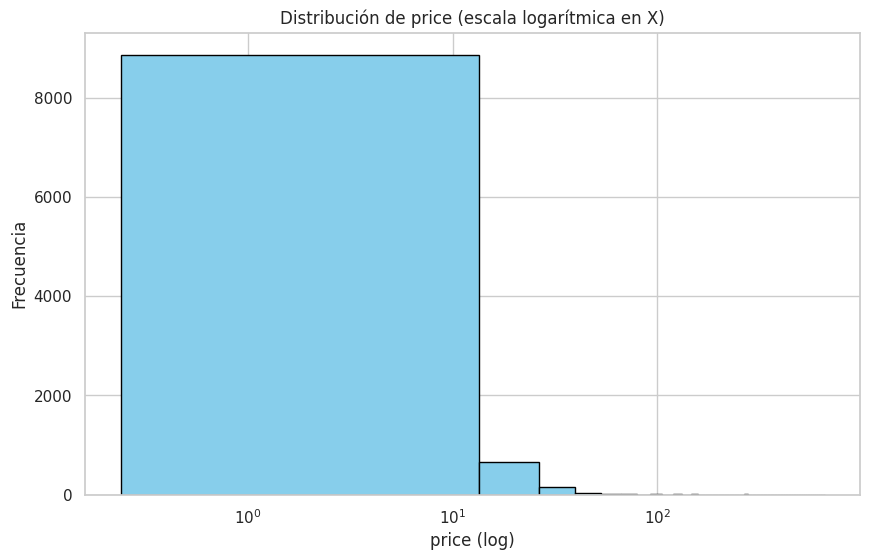

In [ ]:
plt.figure(figsize=(10,6))
df["price"].hist(bins=50, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title("Distribución de price (escala logarítmica en X)")
plt.xlabel("price (log)")
plt.ylabel("Frecuencia")
plt.show()

El gráfico muestra la distribución de price utilizando una escala logarítmica en el eje X. Esta representación permite comprimir la amplia gama de precios y visualizar la concentración de productos en los rangos de precios más bajos. La mayoría de los productos se encuentran en un rango de precios que va de 1 a 10 euros, lo que es evidente por el gran bloque que aparece en este intervalo. A medida que nos movemos hacia la derecha (precios más altos), la frecuencia disminuye de forma drástica, lo que indica que los productos con precios elevados son menos comunes.

Tras construir el gráfico de distribución de precios con escala logarítmica en el eje X, se observó que la mayoría de los valores se concentran en el rango más bajo, generando una barra alta y ancha. Esto se debe a que los intervalos del eje X fueron construidos de manera uniforme, sin considerar las características del conjunto de datos. Para evitar este efecto y obtener una representación más clara, aplicamos intervalos (bins) generados en escala logarítmica. Este enfoque permite dividir el eje X en intervalos uniformes en función del logaritmo de los valores, lo que hace que el gráfico sea más informativo y equilibrado.

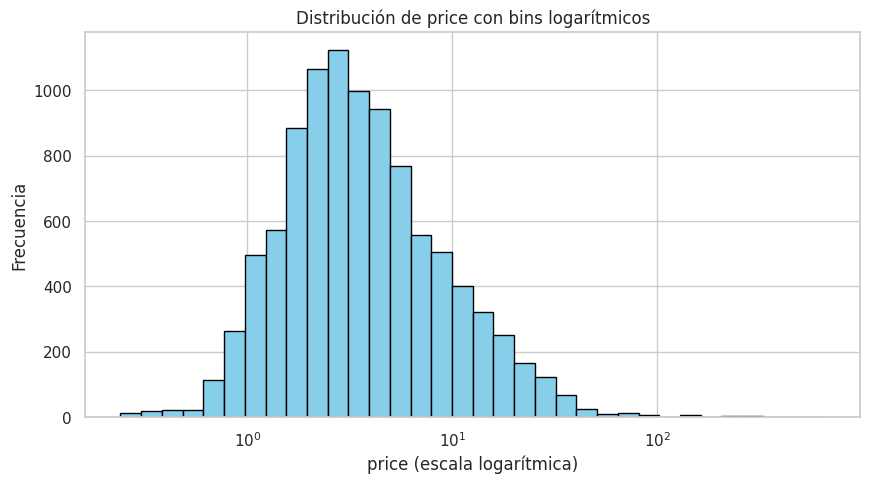

In [ ]:
data = df['price']

# Definimos los límites de los intervalos (bins) en escala logarítmica
# Por ejemplo, desde el valor mínimo positivo hasta el valor máximo
min_valor = data.min()
max_valor = data.max()

# Creamos los intervalos usando escala logarítmica
bins = np.logspace(np.log10(min_valor), np.log10(max_valor), num=35)

# Construimos el histograma
plt.figure(figsize=(10,5))
plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
plt.xscale('log')  # Definimos la escala logarítmica para el eje X
plt.xlabel('price (escala logarítmica)')
plt.ylabel('Frecuencia')
plt.title('Distribución de price con bins logarítmicos')
plt.show()

In [ ]:
# Funcion para contar frecuencia en algun rango
def contar_frecuencia_en_rango(rango_min, rango_max):
    counts, bin_edges = np.histogram(data, bins=bins)
    frecuencia_total = 0
    for i in range(len(counts)):
        if bin_edges[i] >= rango_min and bin_edges[i+1] <= rango_max:
            frecuencia_total += counts[i]
    print(f"Frecuencia total para el rango de {rango_min}–{rango_max} euros: {frecuencia_total}")

contar_frecuencia_en_rango(0, 1)

Frecuencia total para el rango de 0–1 euros: 450


In [ ]:
contar_frecuencia_en_rango(1, 10)

Frecuencia total para el rango de 1–10 euros: 7419


In [ ]:
contar_frecuencia_en_rango(10, 30)

Frecuencia total para el rango de 10–30 euros: 736


In [ ]:
contar_frecuencia_en_rango(30, 100)

Frecuencia total para el rango de 30–100 euros: 113


In [ ]:
contar_frecuencia_en_rango(100, 300)

Frecuencia total para el rango de 100–300 euros: 12


In [ ]:
contar_frecuencia_en_rango(300, 700)

Frecuencia total para el rango de 300–700 euros: 3


Este gráfico muestra la distribución de price, donde el eje X está construido en escala logarítmica, y los intervalos (bins) están ajustados para reflejar todo el rango de precios. La mayoría de los productos se concentra en el rango bajo de precios: entre 1 y 10 euro con una frecuencia total de 7419 productos. En el rango de 10–30 euros, la cantidad de productos disminuye, con una frecuencia de 736. Más adelante, en el rango de 30–100 euros, la frecuencia cae a unos 113 productos. En los rangos más altos, a partir de 100 euros, la frecuencia es muy baja, con solo algunos productos aislados.
En resumen, el gráfico revela una distribución típica sesgada hacia la derecha: muchos productos baratos y una frecuencia que disminuye gradualmente a medida que aumenta el precio.

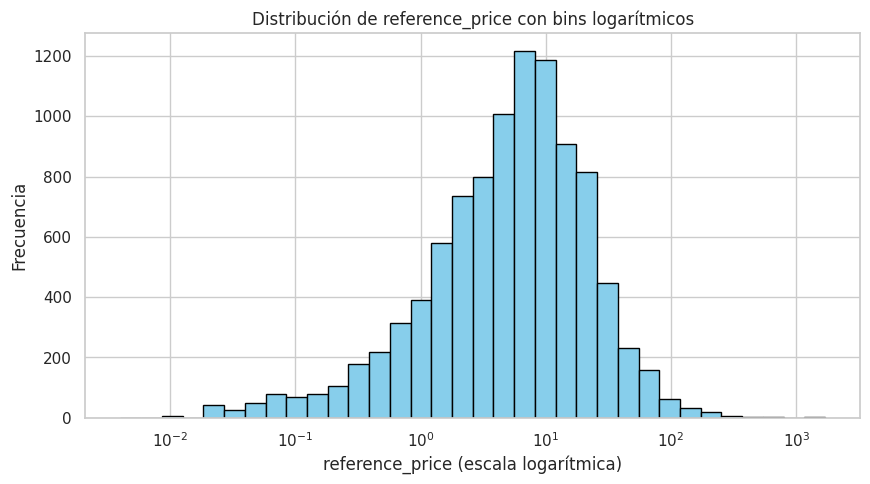

In [ ]:
data = df['reference_price']

# Definimos los límites de los intervalos (bins) en escala logarítmica
# Por ejemplo, desde el valor mínimo positivo hasta el valor máximo
min_valor = data.min()
max_valor = data.max()

# Creamos los intervalos usando escala logarítmica
bins = np.logspace(np.log10(min_valor), np.log10(max_valor), num=35)

# Construimos el histograma
plt.figure(figsize=(10,5))
plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
plt.xscale('log')  # Definimos la escala logarítmica para el eje X
plt.xlabel('reference_price (escala logarítmica)')
plt.ylabel('Frecuencia')
plt.title('Distribución de reference_price con bins logarítmicos')
plt.show()

In [ ]:
contar_frecuencia_en_rango(0, 0.1)

Frecuencia total para el rango de 0–0.1 euros: 203


In [ ]:
contar_frecuencia_en_rango(0.1, 1)

Frecuencia total para el rango de 0.1–1 euros: 893


In [ ]:
contar_frecuencia_en_rango(1, 10)

Frecuencia total para el rango de 1–10 euros: 4331


In [ ]:
contar_frecuencia_en_rango(10, 30)

Frecuencia total para el rango de 10–30 euros: 1724


In [ ]:
contar_frecuencia_en_rango(30, 100)

Frecuencia total para el rango de 30–100 euros: 390


In [ ]:
contar_frecuencia_en_rango(100, 300)

Frecuencia total para el rango de 100–300 euros: 50


In [ ]:
contar_frecuencia_en_rango(300, 1000)

Frecuencia total para el rango de 300–1000 euros: 4


In [ ]:
contar_frecuencia_en_rango(1000, 2000)

Frecuencia total para el rango de 1000–2000 euros: 2


En resumen, la mayoría de los productos tienen reference_price entre 1 y 10 €/kg(o por litro, o por unidad) , y el número de productos con precios altos disminuye rápidamente.

# Análisis de valores únicos en campos clave

### Análisis y estandarización de nombres

En esta etapa analizamos la cantidad de valores únicos en columnas esenciales del conjunto de datos, como el nombre de producto, la categoría y la subcategoria.

In [113]:
num_unique_name = df['name'].nunique()
num_unique_name

8753

El dataset contiene 9761 registros y 8753 nombres únicos, lo que significa que hay 1008 productos repetidos según su nombre.
Esto puede deberse a duplicaciones exactas, distintas versiones de un mismo producto o errores de carga. Eliminamos las filas duplicadas que tienen todos los campos iguales excepto por la columna de fecha. Además, contaremos cuántas filas fueron eliminadas.

In [114]:
# Eliminamos duplicados basados en todas las columnas excepto 'date'
df = df.drop_duplicates(subset=[col for col in df.columns if col != 'date'], keep='first')

# Contamos cuántas filas fueron eliminadas
cantidad_filas_eliminadas = 9761 - len(df)
print(f"Cantidad de filas eliminadas: {cantidad_filas_eliminadas}")

Cantidad de filas eliminadas: 103


Vamos a identificar los nombres que aparecen más de una vez y analizar sus diferencias.

In [115]:
# Contamos cuántas veces aparece cada nombre
name_counts = df['name'].value_counts()

# Encontramos los nombres duplicados (aquellos que aparecen más de una vez)
nombres_duplicados = name_counts[name_counts > 1].reset_index()
nombres_duplicados

,name,count
0,Red Bull Winter Edition sabor iced vanilla berry sin azúcar lata 25 cl.,8
1,Red Bull Bebida Energética lata 47.3 cl,8
2,Red Bull Bebida Energética coco y arándanos lata 25 cl,8
3,Red Bull Bebida Energética lata 35.5 cl,8
4,Red Bull Bebida Energética Zero lata 25 cl,8
...,...,...
647,Yogur líquido de frutas del bosque Carrefour Classic' sin gluten 1.5 l,2
648,Cappelletti jamón Buitoni 230 g.,2
649,Bífidus desnatado edulcorado natural Danone Activia pack de 8 unidades de 120 g.,2
650,LECH.CORP.BAB.SEBAMED 750ML,2


Hemos detectado 652 nombres de productos repetidos. Esto puede deberse a diferentes formatos o presentaciones (por ejemplo, distintos tamaños o volúmenes), o duplicaciones accidentales durante la carga de los datos. Ahora extraemos del dataframe original todas las filas donde el campo name pertenece a esta lista y las ordenamos por name. Esto facilita la revisión visual y nos permite comprobar si realmente existen diferencias justificadas entre los registros con el mismo nombre o si se trata simplemente de duplicación.

In [116]:
# Creamos una lista con los nombres duplicados
nombres_duplicados_lista = nombres_duplicados['name'].tolist()

# Filtramos el DataFrame original para quedarnos solo con los nombres duplicados
df_nombres_duplicados = df[df['name'].isin(nombres_duplicados_lista)]

# Ordenamos por nombre para facilitar el análisis visual
df_nombres_duplicados = df_nombres_duplicados.sort_values(by=['name'])

# Mostramos los primeros 40 registros
df_nombres_duplicados.head(40)

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
6636,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Aceite argán 100% puro ecológico Arganour 50 ml.,50 ml,8.95,17.90,100ml,2025-04-14
8209,Parafarmacia,Cuidado corporal,Cremas y Lociones,Aceite argán 100% puro ecológico Arganour 50 ml.,50 ml,8.95,17.90,100ml,2025-04-16
8210,Parafarmacia,Cuidado corporal,Cremas y Lociones,Aceite para el cuidado de la piel Bio-Oil 60 ml.,60 ml,10.69,17.82,100ml,2025-04-16
6287,Parafarmacia,Bebé,Embarazo y Lactancia,Aceite para el cuidado de la piel Bio-Oil 60 ml.,60 ml,10.69,17.82,100ml,2025-04-14
2907,La Despensa,Aperitivos,Aceitunas y Encurtidos,Aceitunas verdes rellenas de anchoa Carrefour 150 g.,150 g,1.05,7.00,kg,2025-04-14
2925,La Despensa,Aperitivos,Aceitunas y Encurtidos,Aceitunas verdes rellenas de anchoa Carrefour 150 g.,150 g,1.55,10.33,kg,2025-04-14
5122,Perfumería e Higiene,Cabello,Champús,Acondicionador hidrata & purifica con ácido hialurónico & arcilla blanca limpia y purifica el cabello graso e hidrata Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
7301,Perfumería e Higiene,Baño e Higiene Corporal,Desodorantes,Acondicionador hidrata & purifica con ácido hialurónico & arcilla blanca limpia y purifica el cabello graso e hidrata Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-15
5007,Perfumería e Higiene,Baño e Higiene Corporal,Geles de Baño,Acondicionador hidrata & purifica con ácido hialurónico & arcilla blanca limpia y purifica el cabello graso e hidrata Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
5217,Perfumería e Higiene,Cabello,Acondicionadores,Acondicionador hidrata & purifica con ácido hialurónico & arcilla blanca limpia y purifica el cabello graso e hidrata Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14


Podemos notar que el producto "acondicionador para el cabello" no solo aparece en su subcategoría principal, sino también en otras subcategorías como "Desodorantes" o "Geles de Baño". Esto puede indicar una clasificación incorrecta que puede afectar los resultados da analisis posterior.

In [117]:
df_nombres_duplicados[df_nombres_duplicados['category'] == 'Perfumería e Higiene'].head(20)

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
5122,Perfumería e Higiene,Cabello,Champús,Acondicionador hidrata & purifica con ácido hialurónico & arcilla blanca limpia y purifica el cabello graso e hidrata Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
7301,Perfumería e Higiene,Baño e Higiene Corporal,Desodorantes,Acondicionador hidrata & purifica con ácido hialurónico & arcilla blanca limpia y purifica el cabello graso e hidrata Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-15
5007,Perfumería e Higiene,Baño e Higiene Corporal,Geles de Baño,Acondicionador hidrata & purifica con ácido hialurónico & arcilla blanca limpia y purifica el cabello graso e hidrata Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
5217,Perfumería e Higiene,Cabello,Acondicionadores,Acondicionador hidrata & purifica con ácido hialurónico & arcilla blanca limpia y purifica el cabello graso e hidrata Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
5190,Perfumería e Higiene,Cabello,Cuidado y Tratamientos del cabello,Acondicionador hidrata & purifica con ácido hialurónico & arcilla blanca limpia y purifica el cabello graso e hidrata Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
5118,Perfumería e Higiene,Cabello,Champús,Acondicionador hidratación intensa para cabello seco o dañado Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
5215,Perfumería e Higiene,Cabello,Acondicionadores,Acondicionador hidratación intensa para cabello seco o dañado Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
5004,Perfumería e Higiene,Baño e Higiene Corporal,Geles de Baño,Acondicionador hidratación intensa para cabello seco o dañado Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
5186,Perfumería e Higiene,Cabello,Cuidado y Tratamientos del cabello,Acondicionador hidratación intensa para cabello seco o dañado Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
5211,Perfumería e Higiene,Cabello,Acondicionadores,Acondicionador liso & sedoso para cabello seco o encrespado Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14


Al analizar esta categoría en el sitio web, se observa que los acondicionadores para el cabello solo se encuentran en su sección correspondiente. Lo mismo pasa con otros productos de esta categoria. Es posible que esta duplicación en otras subcategorías se deba a la presencia de publicidad de este producto en las páginas de dichas subcategorías. Vamos a eliminar estos duplicados.

In [118]:
# Eliminamos las filas con indices

indices_a_eliminar = [7301, 5121, 5187, 5119, 5005, 5188, 5120, 5006, 7298, 5118, 5004, 5186, 5007, 5122, 5190, 5031, 5371, 7316, 5017, 5025, 7310, 7314,
                      5029, 5030, 7315, 5026, 7311, 7313, 5028, 7309, 5024, 5027, 7312, 5148, 5473, 5539, 5440, 5468, 5434, 5533, 5474, 5441, 5540, 5435,
                      5469, 5534, 5439, 5472, 5538, 5437, 5536, 5471, 5438, 5537, 5470, 5436, 5435, 5464, 5189, 7299, 5146, 5147, 5149, 5142, 5141, 5150,
                      5145, 5151, 5019, 5143, 5067, 5076, 7493, 5075, 7492, 5074, 7491, 5073, 7490, 5393, 5392, 5391, 7489, 7488, 7297, 5069, 5369, 5370,
                      5068, 5070, 5016, 5014, 5072, 5071, 7486, 5015, 5078, 7483, 5535, 7297, 5018]

# Eliminamos las filas del DataFrame original
df = df.drop(indices_a_eliminar)

# Especificamos los índices a modificar
indices_a_modificar = [7501, 7502, 7503]

# Cambiamos el valor en la columna 'subsubcategory'
df.loc[indices_a_modificar, 'subsubcategory'] = 'Cepillos, Recambios y Accesorios'

# Mostramos los cambios para verificar
df.loc[indices_a_modificar]

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
7501,Perfumería e Higiene,Boca y Sonrisa,"Cepillos, Recambios y Accesorios",Cepillo de dientes suave limpieza profunda 360° Colgate 1 ud.,NaN,4.45,4.45,ud,2025-04-15
7502,Perfumería e Higiene,Boca y Sonrisa,"Cepillos, Recambios y Accesorios",Cepillo de dientes medio blanqueador Max White 360° Colgate 1 ud.,NaN,4.65,4.65,ud,2025-04-15
7503,Perfumería e Higiene,Boca y Sonrisa,"Cepillos, Recambios y Accesorios",Cepillo de dientes de batería extra suave para niños 3+ años Minions Colgate 1 ud.,NaN,10.75,10.75,ud,2025-04-15


In [119]:
df_nombres_duplicados[df_nombres_duplicados['subcategory'] == 'Panaderia_Bollería y Pastelería'].head(20)

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
8755,La Despensa,Panaderia_Bollería y Pastelería,Masa Fresca y Bases,Bases de pizza artesanas extrafinas Carrefour pack de 3 bases de 125 g.,pack,1.57,4.19,kg,2025-04-16
8712,La Despensa,Panaderia_Bollería y Pastelería,Bollería,Berlina American Donuts 2 ud.,NaN,2.55,16.35,kg,2025-04-16
8740,La Despensa,Panaderia_Bollería y Pastelería,Pastelería,Berlina American Donuts 2 ud.,NaN,2.55,16.35,kg,2025-04-16
8738,La Despensa,Panaderia_Bollería y Pastelería,Pastelería,Berlina Bombon Donuts 6 ud.,NaN,4.39,13.30,kg,2025-04-16
8710,La Despensa,Panaderia_Bollería y Pastelería,Bollería,Berlina Bombon Donuts 6 ud.,NaN,4.39,13.30,kg,2025-04-16
8737,La Despensa,Panaderia_Bollería y Pastelería,Pastelería,Berlina Fondant Donuts 204 g.,204 g,2.99,14.66,kg,2025-04-16
8709,La Despensa,Panaderia_Bollería y Pastelería,Bollería,Berlina Fondant Donuts 204 g.,204 g,2.99,14.66,kg,2025-04-16
8736,La Despensa,Panaderia_Bollería y Pastelería,Pastelería,Berlina bombón Donuts 2 ud.,NaN,1.99,18.09,kg,2025-04-16
8708,La Despensa,Panaderia_Bollería y Pastelería,Bollería,Berlina bombón Donuts 2 ud.,NaN,1.99,18.09,kg,2025-04-16
8715,La Despensa,Panaderia_Bollería y Pastelería,Bollería,Berlina de crema Donuts 164 g.,164 g,2.45,14.94,kg,2025-04-16


In [120]:
# Eliminamos las filas con índices 8797, 8858, 8796, 8835, 8808, 8861, 8868, 8867, 8863, 8865, 8866
indices_a_eliminar = [8797, 8858, 8796, 8835, 8808, 8861, 8868, 8867, 8863, 8865, 8866]

# Eliminamos las filas del DataFrame original
df = df.drop(indices_a_eliminar)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9548 entries, 0 to 9764
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category         9548 non-null   object        
 1   subcategory      9548 non-null   object        
 2   subsubcategory   9548 non-null   object        
 3   name             9548 non-null   object        
 4   description      7605 non-null   object        
 5   price            9548 non-null   float64       
 6   reference_price  9548 non-null   float64       
 7   reference_unit   9548 non-null   object        
 8   date             9548 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 745.9+ KB


In [121]:
df_nombres_duplicados[df_nombres_duplicados['category'] == 'Parafarmacia'].head(20)

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
6636,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Aceite argán 100% puro ecológico Arganour 50 ml.,50 ml,8.95,17.90,100ml,2025-04-14
8209,Parafarmacia,Cuidado corporal,Cremas y Lociones,Aceite argán 100% puro ecológico Arganour 50 ml.,50 ml,8.95,17.90,100ml,2025-04-16
8210,Parafarmacia,Cuidado corporal,Cremas y Lociones,Aceite para el cuidado de la piel Bio-Oil 60 ml.,60 ml,10.69,17.82,100ml,2025-04-16
6287,Parafarmacia,Bebé,Embarazo y Lactancia,Aceite para el cuidado de la piel Bio-Oil 60 ml.,60 ml,10.69,17.82,100ml,2025-04-14
6595,Parafarmacia,Cuidado corporal,Desodorantes,Acondicionador hidratación intensa para cabello seco o dañado Tresemmé 685 ml.,685 ml,5.69,0.83,100ml,2025-04-14
6676,Parafarmacia,Cuidado e higiene facial,Desmaquillantes,Agua micelar Dermatoclean Eucerin 400 ml.,400 ml,14.89,3.72,100ml,2025-04-14
6703,Parafarmacia,Cuidado e higiene facial,Tónicos y Lociones,Agua micelar Dermatoclean Eucerin 400 ml.,400 ml,14.89,3.72,100ml,2025-04-14
6496,Parafarmacia,Botiquín,Apósitos y Gasas,Apósitos callos medianos Compeed 10 ud.,NaN,8.09,0.81,ud,2025-04-14
6796,Parafarmacia,Cuidado de manos y pies,Apósitos y Plantillas,Apósitos callos medianos Compeed 10 ud.,NaN,8.09,0.81,ud,2025-04-14
6331,Parafarmacia,Bebé,Champú,BA?O ESP.LETI BABY SEBAM1000,NaN,18.49,1.85,100ml,2025-04-14


In [122]:
# Eliminamos las filas con índices 6595, 6614, 8189, 8178, 6596, 6612, 6613, 6597, 6611, 6609, 6610, 8203, 6325
indices_a_eliminar = [6595, 6614, 8189, 8178, 6596, 6612, 6613, 6597, 6611, 6609, 6610, 8203, 6325, 6695, 8221, 8204, 8197, 8196, 8205, 8201, 8200, 8206, 8182, 8198, 8202, 8885]

# Eliminamos las filas del DataFrame original
df = df.drop(indices_a_eliminar)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9522 entries, 0 to 9764
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category         9522 non-null   object        
 1   subcategory      9522 non-null   object        
 2   subsubcategory   9522 non-null   object        
 3   name             9522 non-null   object        
 4   description      7579 non-null   object        
 5   price            9522 non-null   float64       
 6   reference_price  9522 non-null   float64       
 7   reference_unit   9522 non-null   object        
 8   date             9522 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 743.9+ KB


In [123]:
df_nombres_duplicados[df_nombres_duplicados['category'] == 'Bebidas'].head(20)

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
3797,Bebidas,Aguas y Zumos,Agua con sabor,Agua con gas Maison Perrier sabor lima 50 cl,NaN,1.18,2.36,l,2025-04-14
3782,Bebidas,Aguas y Zumos,Agua con gas,Agua con gas Maison Perrier sabor lima 50 cl,NaN,1.18,2.36,l,2025-04-14
3777,Bebidas,Aguas y Zumos,Agua con gas,Agua con gas Maison Perrier sabor limón 50 cl,NaN,1.18,2.36,l,2025-04-14
3793,Bebidas,Aguas y Zumos,Agua con sabor,Agua con gas Maison Perrier sabor limón 50 cl,NaN,1.18,2.36,l,2025-04-14
9314,Bebidas,Aguas y Zumos,Agua hasta 0.75 litros,Agua mineral Carrefour Kids tapón deportivo 33 cl.,NaN,0.40,1.21,l,2025-04-16
9295,Bebidas,Aguas y Zumos,Agua hasta 0.75 litros,Agua mineral Carrefour Kids tapón deportivo 33 cl.,NaN,0.26,0.79,l,2025-04-16
9302,Bebidas,Aguas y Zumos,Agua hasta 0.75 litros,Agua mineral Font Vella tapón deportivo 33 cl.,NaN,0.83,2.52,l,2025-04-16
9292,Bebidas,Aguas y Zumos,Agua hasta 0.75 litros,Agua mineral Font Vella tapón deportivo 33 cl.,NaN,0.53,1.61,l,2025-04-16
7094,Bebidas,Aguas y Zumos,Zumos no Refrigerados,Appletiser 100% zumo de manzana con burbujas finas lata 25 cl.,lata,0.90,3.60,l,2025-04-13
3544,Bebidas,Refrescos,Sabores con Gas,Appletiser 100% zumo de manzana con burbujas finas lata 25 cl.,lata,0.90,3.60,l,2025-04-14


In [124]:
# Eliminamos las filas con índices
indices_a_eliminar = [4016, 3246, 3245, 4015, 3247, 4017, 4001, 4142, 4145, 4004, 4144, 4003, 4006, 4147, 4146, 4005, 4141, 4000, 4149, 4008, 4148, 4007, 4143, 4002, 3532,
                      3582, 3537, 3570, 3519, 3649, 3481, 3736, 7070, 3692, 3520, 3737, 3693, 3482, 7071, 3650, 3571, 3699, 7077, 3656, 3488, 3526, 3742, 3743, 3577, 3487,
                      7076, 3576, 3655, 3525, 3698, 3738, 3651, 3572, 3694, 3521, 7072, 3483, 3696, 7074, 3653, 3485, 3740, 3574, 3523, 4061, 3586, 3536, 3531, 3581,
                      3585, 3535, 3589, 3539, 3533, 3583, 3534, 3584, 3430, 3575, 3654, 3486, 3741, 7075, 3599, 7165, 3982, 3568, 3734, 3647, 3517,
                      3479, 3690, 7068, 3691, 3735, 3648, 7069, 3518, 3480, 3569, 3578, 3489, 3700, 7078, 3527, 3657, 3744, 3588, 3499, 3524, 3697, 3573, 3484, 3739, 3522,
                      7073, 3695, 3652, 7009, 7012, 7011, 3414, 3422, 3418, 3419, 6969, 6976, 6977, 7092]

# Eliminamos las filas del DataFrame original
df = df.drop(indices_a_eliminar)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9388 entries, 0 to 9764
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category         9388 non-null   object        
 1   subcategory      9388 non-null   object        
 2   subsubcategory   9388 non-null   object        
 3   name             9388 non-null   object        
 4   description      7451 non-null   object        
 5   price            9388 non-null   float64       
 6   reference_price  9388 non-null   float64       
 7   reference_unit   9388 non-null   object        
 8   date             9388 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 733.4+ KB


In [125]:
df_nombres_duplicados[df_nombres_duplicados['category'] == 'La Despensa'].head(20)

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
2907,La Despensa,Aperitivos,Aceitunas y Encurtidos,Aceitunas verdes rellenas de anchoa Carrefour 150 g.,150 g,1.05,7.00,kg,2025-04-14
2925,La Despensa,Aperitivos,Aceitunas y Encurtidos,Aceitunas verdes rellenas de anchoa Carrefour 150 g.,150 g,1.55,10.33,kg,2025-04-14
1547,La Despensa,Alimentación,Especias y Sazonadores,Ajo congelado Carrefour 100 g.,100 g,2.09,20.90,kg,2025-04-13
2634,La Despensa,Yogures y Postres,Otros Postres,Arroz con leche Carrefour pack de 4 unidades de 115 g.,pack,1.70,3.70,kg,2025-04-14
2615,La Despensa,Yogures y Postres,Otros Postres,Arroz con leche Carrefour pack de 4 unidades de 115 g.,pack,1.27,2.76,kg,2025-04-14
9210,La Despensa,Conservas_Sopas y Precocinados,Tortillas_Empanadillas y Sandwiches,Baguettes de jamón y queso Carrefour 250 g.,250 g,1.99,7.96,kg,2025-04-16
2172,La Despensa,Desayuno,Barritas,Barrita de chocolate negro alta en proteínas Carrefour Sensation 120 g,120 g,3.45,28.75,kg,2025-04-14
1714,La Despensa,Alimentación,Nutrición deportiva,Barrita de chocolate negro alta en proteínas Carrefour Sensation 120 g,120 g,3.45,28.75,kg,2025-04-14
2169,La Despensa,Desayuno,Barritas,Barrita de chocolate negro alta en proteínas Carrefour Sensation 40 g.,40 g,1.41,35.25,kg,2025-04-14
1713,La Despensa,Alimentación,Nutrición deportiva,Barrita de chocolate negro alta en proteínas Carrefour Sensation 40 g.,40 g,1.41,35.25,kg,2025-04-14


In [126]:
# Eliminamos las filas con índices
indices_a_eliminar = [1369, 1366, 1370, 2849, 2844, 2847, 3111, 3108, 3107, 3106, 3105, 3112, 3109, 9203, 2867, 2868, 3104, 1367, 1368, 2961, 9199, 9200, 2472,
                      2962, 3110, 9204, 3082, 2973, 3173, 3086, 3174, 2974, 2976, 3176, 3088, 2975, 3175, 3087, 2972, 3172, 3084, 1547, 3085, 2953, 2858, 2866,
                      2865, 2857, 2861, 2864, 2863, 2859, 2860, 2845, 2951, 2960, 2959, 2956, 2957, 3034, 2953, 3085, 3587]

# Eliminamos las filas del DataFrame original
df = df.drop(indices_a_eliminar)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9327 entries, 0 to 9764
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category         9327 non-null   object        
 1   subcategory      9327 non-null   object        
 2   subsubcategory   9327 non-null   object        
 3   name             9327 non-null   object        
 4   description      7390 non-null   object        
 5   price            9327 non-null   float64       
 6   reference_price  9327 non-null   float64       
 7   reference_unit   9327 non-null   object        
 8   date             9327 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 728.7+ KB


In [127]:
df_nombres_duplicados[df_nombres_duplicados['category'] == 'Productos Frescos'].head(20)

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
168,Productos Frescos,Carnicería,Otras carnes,Albondigas de pollo congeladas Simon´s Food 1 Kg,1 Kg,6.25,6.25,kg,2025-04-13
192,Productos Frescos,Carnicería,Carne Picada,Albondigas de pollo congeladas Simon´s Food 1 Kg,1 Kg,6.25,6.25,kg,2025-04-13
188,Productos Frescos,Carnicería,Carne Picada,Albóndigas de cerdo Carrefour el Mercado sin gluten y sin lactosa 800 g,800 g,4.25,5.31,kg,2025-04-13
132,Productos Frescos,Carnicería,Otras carnes,Albóndigas de cerdo Carrefour el Mercado sin gluten y sin lactosa 800 g,800 g,4.25,5.31,kg,2025-04-13
661,Productos Frescos,Charcutería,Bacon y Panceta,Bacon cocido ahumado en lonchas El Pozo sin gluten y sin lactosa 110 g,110 g,1.49,13.55,kg,2025-04-13
684,Productos Frescos,Charcutería,Mortadela y Chopped,Bacon cocido ahumado en lonchas El Pozo sin gluten y sin lactosa 110 g,110 g,1.49,13.55,kg,2025-04-13
662,Productos Frescos,Charcutería,Bacon y Panceta,Bacon cocido ahumado lonchas corte fresco El Pozo sin gluten sin lactosa 150 g.,150 g,2.69,17.93,kg,2025-04-13
686,Productos Frescos,Charcutería,Mortadela y Chopped,Bacon cocido ahumado lonchas corte fresco El Pozo sin gluten sin lactosa 150 g.,150 g,2.69,17.93,kg,2025-04-13
672,Productos Frescos,Charcutería,Mortadela y Chopped,Bacon en lonchas Carrefour El Mercado sin gluten 200 g,200 g,2.15,10.75,kg,2025-04-13
658,Productos Frescos,Charcutería,Bacon y Panceta,Bacon en lonchas Carrefour El Mercado sin gluten 200 g,200 g,2.15,10.75,kg,2025-04-13


In [128]:
# Eliminamos las filas con índices
indices_a_eliminar = [283, 211, 207, 279, 210, 282, 744, 278, 209, 281, 208, 280, 983, 982, 168, 132]

# Eliminamos las filas del DataFrame original
df = df.drop(indices_a_eliminar)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9311 entries, 0 to 9764
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category         9311 non-null   object        
 1   subcategory      9311 non-null   object        
 2   subsubcategory   9311 non-null   object        
 3   name             9311 non-null   object        
 4   description      7374 non-null   object        
 5   price            9311 non-null   float64       
 6   reference_price  9311 non-null   float64       
 7   reference_unit   9311 non-null   object        
 8   date             9311 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 727.4+ KB


In [129]:
# Contamos cuántas veces aparece cada nombre
name_counts = df['name'].value_counts()

# Encontramos los nombres duplicados (aquellos que aparecen más de una vez)
nombres_duplicados = name_counts[name_counts > 1].reset_index()
nombres_duplicados

,name,count
0,Leche fermentada líquida desnatada con fresa sin azúcar añadido Danone Actimel sin gluten pack de 6 unidades de 100 g.,4
1,Leche fermentada líquida multifrutas Danone - Actimel sin gluten pack de 6 unidades de 100 g.,4
2,Leche fermentada semidesnatada natural Actimel pack de 6 unidades de 100 g.,4
3,Leche fermentada semidesnatada multifrutas Danone Actimel pack de 6 unidades de 100 g.,4
4,Leche fermentada semidesnatada con arándano y mora Danone Actimel pack de 6 unidades de 100 g.,4
...,...,...
519,Puntilla limpia cruda congelada Delfín 450 g.,2
520,Powerade Ice Storm Zero bebida isotónica botella 50 cl.,2
521,Nestea té verde con maracuyá bajo en calorías botella 1.5 l.,2
522,Preparado lácteo infantil de crecimiento desde los 12 meses en polvo Almirón Advance 3 sin aceite de palma 1200 g.,2


In [130]:
# Creamos una lista con los nombres duplicados
nombres_duplicados_lista = nombres_duplicados['name'].tolist()

# Filtramos el DataFrame original para quedarnos solo con los nombres duplicados
df_nombres_duplicados = df[df['name'].isin(nombres_duplicados_lista)]

# Ordenamos por nombre para facilitar el análisis visual
df_nombres_duplicados = df_nombres_duplicados.sort_values(by=['name'])

# Mostramos los primeros 40 registros
df_nombres_duplicados.head(40)

,category,subcategory,subsubcategory,name,description,price,reference_price,reference_unit,date
8209,Parafarmacia,Cuidado corporal,Cremas y Lociones,Aceite argán 100% puro ecológico Arganour 50 ml.,50 ml,8.95,17.90,100ml,2025-04-16
6636,Parafarmacia,Cuidado e higiene facial,Cremas faciales,Aceite argán 100% puro ecológico Arganour 50 ml.,50 ml,8.95,17.90,100ml,2025-04-14
8210,Parafarmacia,Cuidado corporal,Cremas y Lociones,Aceite para el cuidado de la piel Bio-Oil 60 ml.,60 ml,10.69,17.82,100ml,2025-04-16
6287,Parafarmacia,Bebé,Embarazo y Lactancia,Aceite para el cuidado de la piel Bio-Oil 60 ml.,60 ml,10.69,17.82,100ml,2025-04-14
2907,La Despensa,Aperitivos,Aceitunas y Encurtidos,Aceitunas verdes rellenas de anchoa Carrefour 150 g.,150 g,1.05,7.00,kg,2025-04-14
2925,La Despensa,Aperitivos,Aceitunas y Encurtidos,Aceitunas verdes rellenas de anchoa Carrefour 150 g.,150 g,1.55,10.33,kg,2025-04-14
3782,Bebidas,Aguas y Zumos,Agua con gas,Agua con gas Maison Perrier sabor lima 50 cl,NaN,1.18,2.36,l,2025-04-14
3797,Bebidas,Aguas y Zumos,Agua con sabor,Agua con gas Maison Perrier sabor lima 50 cl,NaN,1.18,2.36,l,2025-04-14
3793,Bebidas,Aguas y Zumos,Agua con sabor,Agua con gas Maison Perrier sabor limón 50 cl,NaN,1.18,2.36,l,2025-04-14
3777,Bebidas,Aguas y Zumos,Agua con gas,Agua con gas Maison Perrier sabor limón 50 cl,NaN,1.18,2.36,l,2025-04-14


Después de eliminar los duplicados de categorías incorrectas, relacionados con la presencia de tarjetas de publicidad idénticas a las tarjetas de productos, en las filas restantes con productos duplicados observamos:

1. Existen productos con el mismo nombre dentro de las mismas categorías, pero con diferentes precios. Esto puede indicar que se trata del mismo producto presentado en distintos formatos o empaques, lo cual es una práctica común en los supermercados.

2. Existen productos que están realmente clasificados por el supermercado en dos o más subcategorías. Este mismo patrón también se observa en otros supermercados, lo que confirma que no es un error de recopilación de datos, sino una característica propia de la clasificación de productos en el catálogo.

Hemos decidido no forzar la asignación de cada producto a una única categoría por las siguientes razones:

- al eliminar una de esas asignaciones, existe el riesgo de dejar ciertas categorías incompletas, lo que puede afectar negativamente al análisis posterior (por ejemplo, al comparar precios medios, cantidades o cobertura de surtido);

- si forzamos la asignación a una sola categoría, podríamos obtener una categoría "con datos completos" y otra artificialmente reducida, lo cual distorsionaría los resultados del análisis comparativo entre supermercados o entre familias de productos.

Por estas razones, hemos optado por conservar todos los registros tal como aparecen originalmente, permitiendo que un mismo producto pueda pertenecer a varias categorías si así se refleja en los datos. Esto nos permite mantener una visión más completa y precisa del surtido real.


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9311 entries, 0 to 9764
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category         9311 non-null   object        
 1   subcategory      9311 non-null   object        
 2   subsubcategory   9311 non-null   object        
 3   name             9311 non-null   object        
 4   description      7374 non-null   object        
 5   price            9311 non-null   float64       
 6   reference_price  9311 non-null   float64       
 7   reference_unit   9311 non-null   object        
 8   date             9311 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 727.4+ KB


### Análisis y estandarización de categorias y subcategorias

Calculamos la cantidad de categorias y subcategorias unicas.

In [132]:
num_unique_category = df['category'].nunique()
num_unique_category

9

In [133]:
num_unique_subcategory = df['subcategory'].nunique()
num_unique_subcategory

73

In [134]:
num_unique_subsubcategory = df['subsubcategory'].nunique()
num_unique_subsubcategory

443

En la etapa anterior, observamos que un mismo nombre de producto aparece en varias categorías o subcategorías, y esto no es un error, sino el sistema de clasificación de productos del propio supermercado. Agrupamos los datos por name y contamos cuántos valores únicos hay en las columnas de categoría correspondientes. Luego filtramos aquellos nombres que están asociados a más de una categoría, subcategoría o subcategoría de segundo nivel.

In [135]:
# Agrupamos los datos por 'name' y contamos cuántos valores únicos tiene cada columna de categorización
agrupacion_nombre = df.groupby('name').agg({
    'category': pd.Series.nunique,
    'subcategory': pd.Series.nunique,
    'subsubcategory': pd.Series.nunique
}).reset_index()

# Renombramos las columnas para claridad
agrupacion_nombre.columns = ['name', 'num_category', 'num_subcategory', 'num_subsubcategory']

# Filtramos solo aquellos nombres que aparecen en más de una categoría o subcategoría
nombres_en_varias_categorias = agrupacion_nombre[
    (agrupacion_nombre['num_category'] > 1) |
    (agrupacion_nombre['num_subcategory'] > 1) |
    (agrupacion_nombre['num_subsubcategory'] > 1)]

# Mostramos cuántos casos encontramos
print(f"Nombres que aparecen en múltiples categorías/subcategorías: {len(nombres_en_varias_categorias)}")

nombres_en_varias_categorias.head(20)

Nombres que aparecen en múltiples categorías/subcategorías: 510


,name,num_category,num_subcategory,num_subsubcategory
35,Aceite argán 100% puro ecológico Arganour 50 ml.,1,2,2
66,Aceite para el cuidado de la piel Bio-Oil 60 ml.,1,2,2
143,Agua con gas Maison Perrier sabor lima 50 cl,1,1,2
144,Agua con gas Maison Perrier sabor limón 50 cl,1,1,2
174,Agua de colonia Up! 25 ml.,1,1,2
223,Agua micelar Dermatoclean Eucerin 400 ml.,1,1,2
380,Alimento para Peces Tetragoldfish Escama 1 L,1,1,2
420,Ambientador automático Sensual Sandalwood & Jasmin recambio Touch & Fresh Glade 3 ud.,1,1,2
518,Ambientador un toque relax zen recambio Glade by brise 2 ud.,1,1,2
579,Appletiser 100% zumo de manzana con burbujas finas lata 25 cl.,1,2,2


Hemos identificado 510 nombres de productos que aparecen en más de una categoría o subcategoría. La mayoría de ellos se encuentran en la misma subcategoría, pero en diferentes subsubcategorías.

### Análisis y estandarización de "reference_unit"

Vamos a comprobar la coherencia y estandarización de los valores en la columna reference_unit, que representa la unidad de medida del producto (kilogramos, litros, unidades, etc.).Es importante asegurarnos de que no existan errores tipográficos, espacios adicionales, formatos duplicados (por ejemplo: Kg, kg., KG) o valores no esperados. Vamos a mostrar todas las unidades únicas, su frecuencia, y detectar posibles casos problemáticos.

In [136]:
# Contamos la frecuencia de cada unidad para detectar valores raros
conteo_unidades = df['reference_unit'].value_counts()
conteo_unidades

,count
reference_unit,
kg,4626
ud,1813
l,1547
100ml,1057
100g,123
lavado,113
m,18
docena,13
g,1


Las unidades más comunes son kg, l, ud, 100g y 100ml, lo cual es coherente con la oferta habitual de un supermercado. También se observan unidades menos frecuentes pero válidas como lavado, docena, g y m. Aunque aparecen en menor cantidad, reflejan presentaciones legítimas de ciertos productos (huevos, detergentes, papel) y no requieren corrección.


### Análisis y estandarización de "date"

In [137]:
num_unique_category = df['date'].nunique()
num_unique_category

5

In [138]:
df['date'].unique()

<DatetimeArray>
['2025-04-13 00:00:00', '2025-04-14 00:00:00', '2025-04-12 00:00:00', '2025-04-15 00:00:00', '2025-04-16 00:00:00']
Length: 5, dtype: datetime64[ns]

In [139]:
# Dejamos solo la fecha
df['date'] = df['date'].dt.date

Ya hemos eliminado antes los duplicados donde solo la fecha era diferente.


Volvemos a revisar la estructura general del DataFrame para asegurarnos de que no se haya perdido información importante en el proceso de transformaciones.

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9311 entries, 0 to 9764
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         9311 non-null   object 
 1   subcategory      9311 non-null   object 
 2   subsubcategory   9311 non-null   object 
 3   name             9311 non-null   object 
 4   description      7374 non-null   object 
 5   price            9311 non-null   float64
 6   reference_price  9311 non-null   float64
 7   reference_unit   9311 non-null   object 
 8   date             9311 non-null   object 
dtypes: float64(2), object(7)
memory usage: 727.4+ KB


He notado que aunque tenemos 9311 registros en el DataFrame, pero el rango de índices va de 0 a 9764. Esto ocurre porque hemos eliminado filas en etapas anteriores. Al eliminar filas, Pandas mantiene el índice original, dejando huecos en la numeración de las filas. Para evitar estos huecos y tener un índice ordenado, podemos resetear el índice de la siguiente manera

In [141]:
df.reset_index(drop=True, inplace=True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9311 entries, 0 to 9310
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         9311 non-null   object 
 1   subcategory      9311 non-null   object 
 2   subsubcategory   9311 non-null   object 
 3   name             9311 non-null   object 
 4   description      7374 non-null   object 
 5   price            9311 non-null   float64
 6   reference_price  9311 non-null   float64
 7   reference_unit   9311 non-null   object 
 8   date             9311 non-null   object 
dtypes: float64(2), object(7)
memory usage: 654.8+ KB


Después de todo el proceso de limpieza y revisión, ya tenemos un dataset coherente y sin errores estructurales. Está en condiciones óptimas para continuar con análisis, visualizaciones o comparativas con otros supermercados.


# Converción a un archivo .csv

In [143]:
# Guardamos el DataFrame limpio en un archivo CSV sin índice, con codificación utf-8-sig
df.to_csv('limpio_carrefour.csv', index=False, encoding="utf-8-sig")